### Load project package

In [1]:
setwd('../../')
library(germVar2)
data(all_patients)
data(list_goi)
data(LoF_var)
data(nsSNP_var)

### Number of unique patient in each cancer type

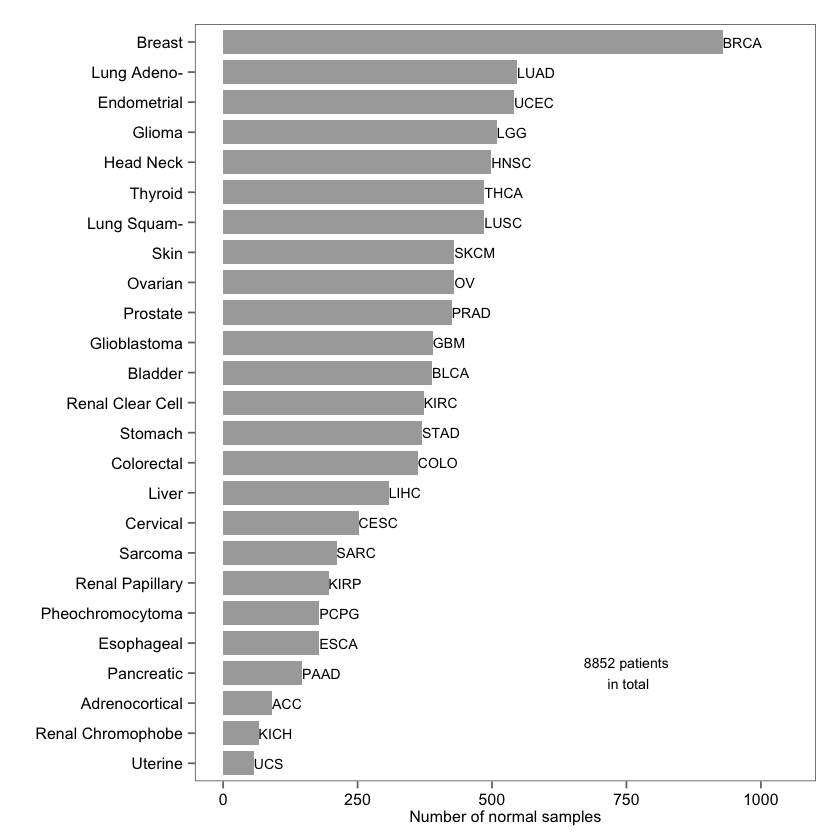

In [3]:
all_tally <- subset(all_patients, !duplicated(disease2))
p <- ggplot(aes(reorder(disease2, study_size), study_size, label=disease2), data=all_tally) + geom_bar(stat = "identity", fill="darkgrey", width=0.8) + coord_flip()
p <- p + theme_few() + geom_text(hjust=0, size=3) 
p <- labelDisease(p)
p <- p + theme(axis.text= element_text(size=rel(0.8)), axis.title= element_text(size=rel(0.8)))
p <- p + xlab("") + ylab("Number of normal samples") + scale_y_continuous(limits=c(0,1050))
p <- p + annotate("text", x="PAAD", y=750, label="8852 patients\n in total", size=3 )
p
ggsave(filename="Figures/sample_overview.pdf",height=5.5, width=4.5)

### Classification of the candidate gene list

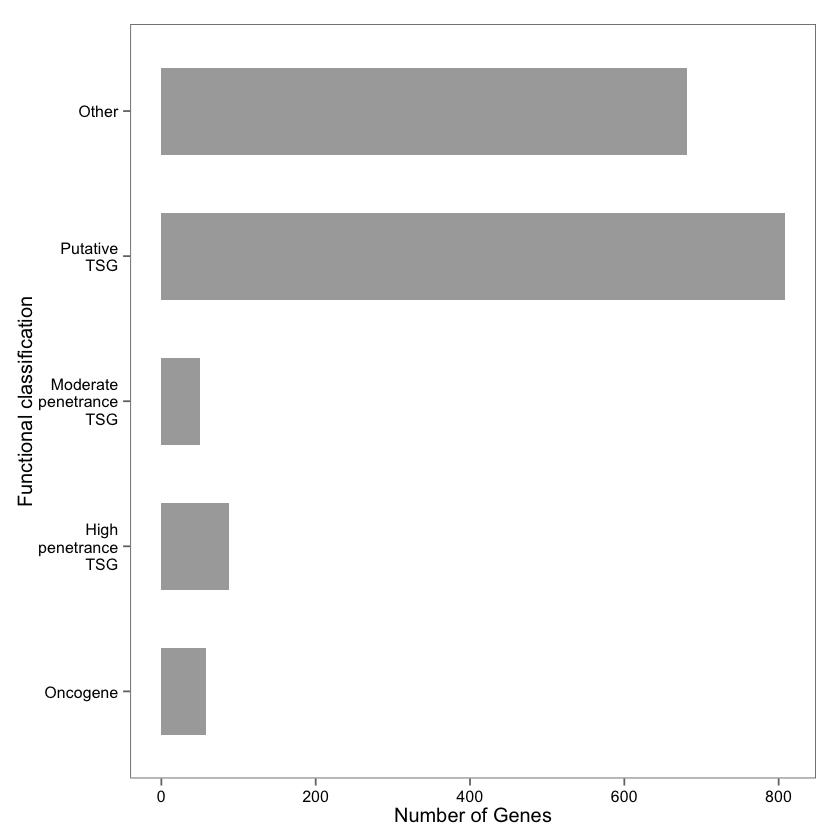

In [3]:
p1 <- ggplot(aes(Class), data= list_goi) + theme_few()
p1 <- p1 + xlab("Functional classification") + ylab("Number of Genes") + theme(legend.position=c(0.8, 0.8))
p1 <- p1 + geom_bar(fill = "darkgrey", width=0.6 ) + theme( axis.title= element_text(size=rel(1)), axis.text.y= element_text(size=rel(1)))
p1 <- p1 + coord_flip() 
p1 <- p1 + scale_x_discrete(labels = c( "OG"="Oncogene",  "H-TSG"="High\npenetrance\nTSG",  
        "M-TSG"="Moderate\npenetrance\nTSG", "Putative\nTSG"="Putative\nTSG", "Other"="Other"))
                             
p1
ggsave(filename="Figures/gene_classification_hist.png",height=4, width=4)


### Sources of the candidate gene list

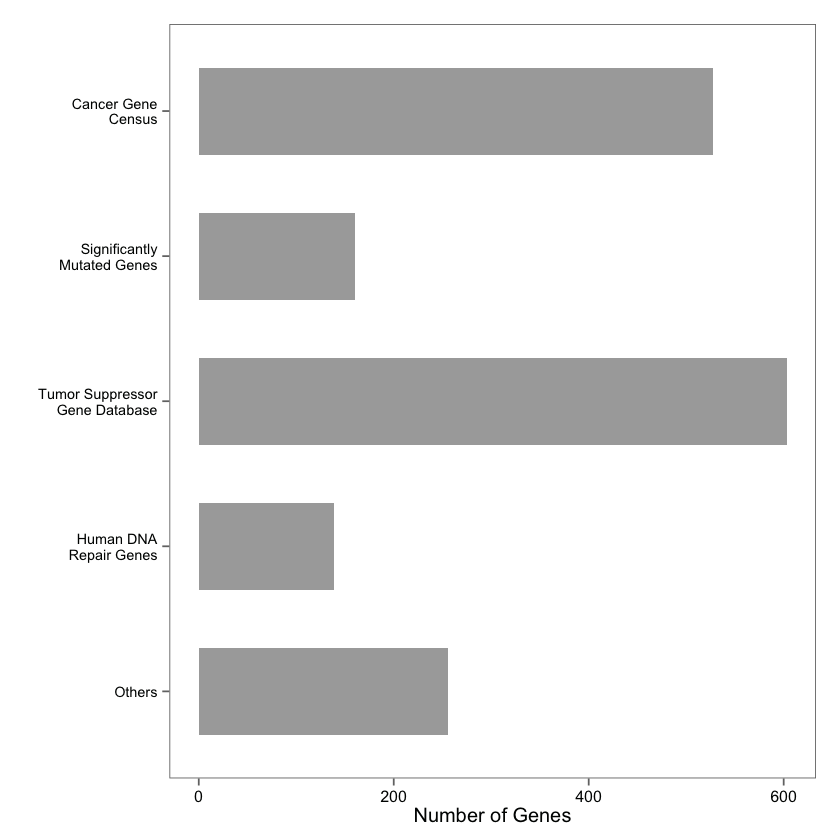

In [8]:
to_plot <- list_goi
to_plot$mem <- factor(to_plot$mem, levels=c("OTHER", "REP", "TSG", "SMG", "CGC"))
p <- ggplot(aes(mem), data= to_plot) + theme_few()
p <- p + xlab("Gene Source") + ylab("Number of Genes") + theme(legend.position=c(0.8, 0.8))
p <- p + geom_bar(fill = "darkgrey", width=0.6 ) 
p <- p + theme( axis.title= element_text(size=rel(1)), axis.text.y= element_text(size=rel(0.9)))
p <- p + scale_x_discrete(labels = c( "CGC"="Cancer Gene\nCensus", "SMG"="Significantly\nMutated Genes", "TSG" ="Tumor Suppressor\nGene Database", "REP"="Human DNA\nRepair Genes", "OTHER"="Others"))
p <- p + coord_flip() + xlab("")
#p <- p + geom_bar(aes(fill=Cat), data= subset(to_plot, cgc500) ) 
p
ggsave(filename="Figures/candidate_gene_hist.png",height=4, width=4)


### Overview of variants allele count distribution

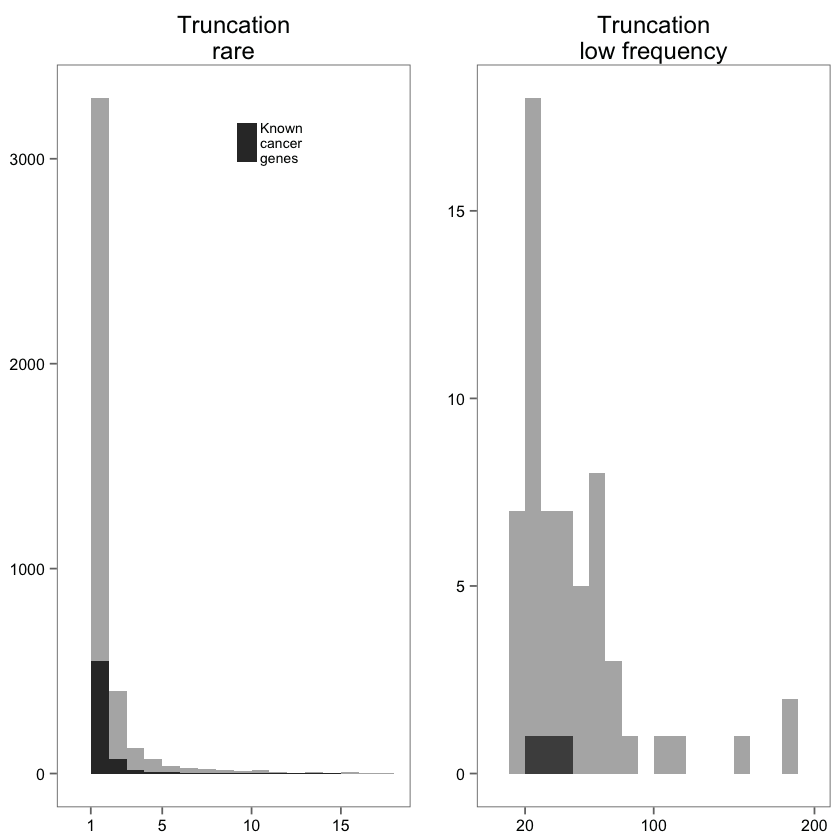

pdf 
  2

pdf 
  2

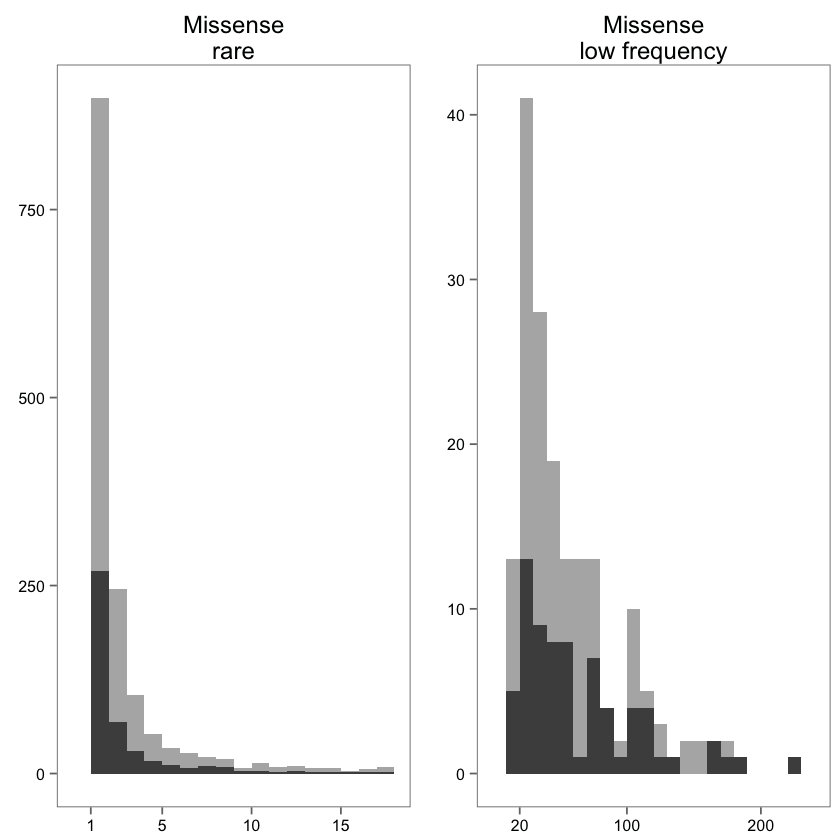

In [7]:

# allele count distribution
library(gridExtra)
p1a <- ggplot(aes(TAC2), data=subset(LoF_rv, tier1 |tier2)) + theme_few() 
p1a <- p1a + geom_bar(fill="grey70", width=0.8, binwidth=1)
p1a <- p1a + geom_bar(aes(fill=(driver|HER)), data =  subset(LoF_rv, (tier1 |tier2 ) & (driver|HER)), width=0.8, binwidth=1)
p1a <- p1a + scale_x_continuous(breaks=c(1, 5, 10, 15)) 
p1a <- p1a + scale_fill_manual(values=c("grey20"), guide = guide_legend(title=NULL, keywidth=0.8, keyheight=0.5), labels=c("Known\ncancer\ngenes", "Candidate\ncancer genes"))
p1a <- p1a  + labs(x=NULL, y=NULL) + theme(legend.position=c(0.6,0.9))
p1a <- p1a + theme(plot.margin = unit(c(0.2,0.1,0.2,0.2), "cm"), legend.text=element_text(size=rel(.7)))
p1a <- p1a + ggtitle("Truncation\nrare")

p1b <- ggplot(aes(TAC2), data=subset(LoF_lf, tier1 |tier2)) + theme_few() 
p1b <- p1b + geom_bar(fill="grey70", width=0.6, binwidth=10)
p1b <- p1b + geom_bar(aes(fill=(driver|HER)), data =  subset(LoF_lf, (tier1 |tier2 ) & (driver|HER)), width=0.6, binwidth=10)
p1b <- p1b + scale_x_continuous(breaks=c(20, 100, 200))
p1b <- p1b + scale_fill_manual(values=c("grey30", "grey80"), guide = "none")
p1b <- p1b + labs(x=NULL, y=NULL) + theme(plot.margin = unit(c(0.2,0.2,0.2,0.1), "cm"))
p1b <- p1b + ggtitle("Truncation\nlow frequency")

p2a <- ggplot(aes(TAC2), data=nsSNP_rv) + theme_few() 
p2a <- p2a + geom_bar(fill="grey70", width=0.8, binwidth=1)
p2a <- p2a + geom_bar(aes(fill=(driver|HER)), data =  subset(nsSNP_rv, (driver|HER)), width=0.8, binwidth=1)
p2a <- p2a + scale_x_continuous(breaks=c(1, 5, 10, 15)) 
p2a <- p2a + scale_fill_manual(values=c("grey30", "grey80"), guide = "none")
p2a <- p2a  +  labs(x=NULL, y=NULL) + theme(plot.margin = unit(c(0.2,0.1,0.2,0.2), "cm"))
p2a <- p2a + ggtitle("Missense\nrare")

p2b <- ggplot(aes(TAC2), data=nsSNP_lf) + theme_few() 
p2b <- p2b + geom_bar(fill="grey70", width=0.6, binwidth=10)
p2b <- p2b + geom_bar(aes(fill=(driver|HER)), data =  subset(nsSNP_lf, (driver|HER)), width=0.6, binwidth=10)
p2b <- p2b + scale_x_continuous(breaks=c(20, 100, 200)) #geom_bar(fill="darkgrey") #+ facet_wrap(~ lf, scales="free")
p2b <- p2b + scale_fill_manual(values=c("grey30", "grey80"), guide = "none")
p2b <- p2b + labs(x=NULL, y=NULL)+ theme(plot.margin = unit(c(0.2,0.2,0.2,0.1), "cm"))
p2b <- p2b + ggtitle("Missense\nlow frequency")

pl <- unifyPlotDim(list(p1a, p1b, p2a, p2b))
grid.arrange(pl[[1]], pl[[2]], nrow=1)
grid.arrange(pl[[3]], pl[[4]], nrow=1)

pdf(file="Figures/LoF_AC_hist.pdf", height=3.5, width=3.5)
do.call(grid.arrange, c(pl[1:2], nrow=1))#, heights=c(0.25, 0.75))
dev.off()
pdf(file="Figures/nsSNP_AC_hist.pdf", height=3.5, width=3.5)
do.call(grid.arrange, c(pl[3:4], nrow=1))#, heights=c(0.25, 0.75))
dev.off()
